In [ ]:
# Lets load the Gemini API key from a .env file and configure the Gemini model
import os
from dotenv import load_dotenv
import google.generativeai as genai

# 1. Load the .env file from the current folder
load_dotenv()

# 2. Retrieve the key securely
my_api_key = os.getenv("GEMINI_API_KEY")

# Check if key loaded correctly (Optional safety check)
if not my_api_key:
    print("Error: API Key not found. Check your .env file!")
else:
    print("API Key loaded successfully.")

# 3. Configure Gemini
genai.configure(api_key=my_api_key)

# 4. Run the model
model = genai.GenerativeModel('gemini-2.5-flash-lite')

# Let's view the first few characters in the key
print(my_api_key[:5])

API Key loaded successfully.
AIzaS


In [7]:
# Define a helper function named "print_markdown" to display markdown
from IPython.display import display, Markdown  

def print_markdown(text):
    """Displays text as Markdown in Jupyter."""
    display(Markdown(text))

In [8]:
# Let's try loading and displaying a sample image
# Before sending images to OpenAI API, we need to learn how to load and view them in our notebook
# We'll use the Pillow library (imported as PIL) for this task

# Import Pillow for image handling
from PIL import Image  

Image 'images/pancake.jpg' loaded successfully.
Format: JPEG
Size: (2841, 1735)
Mode: RGB


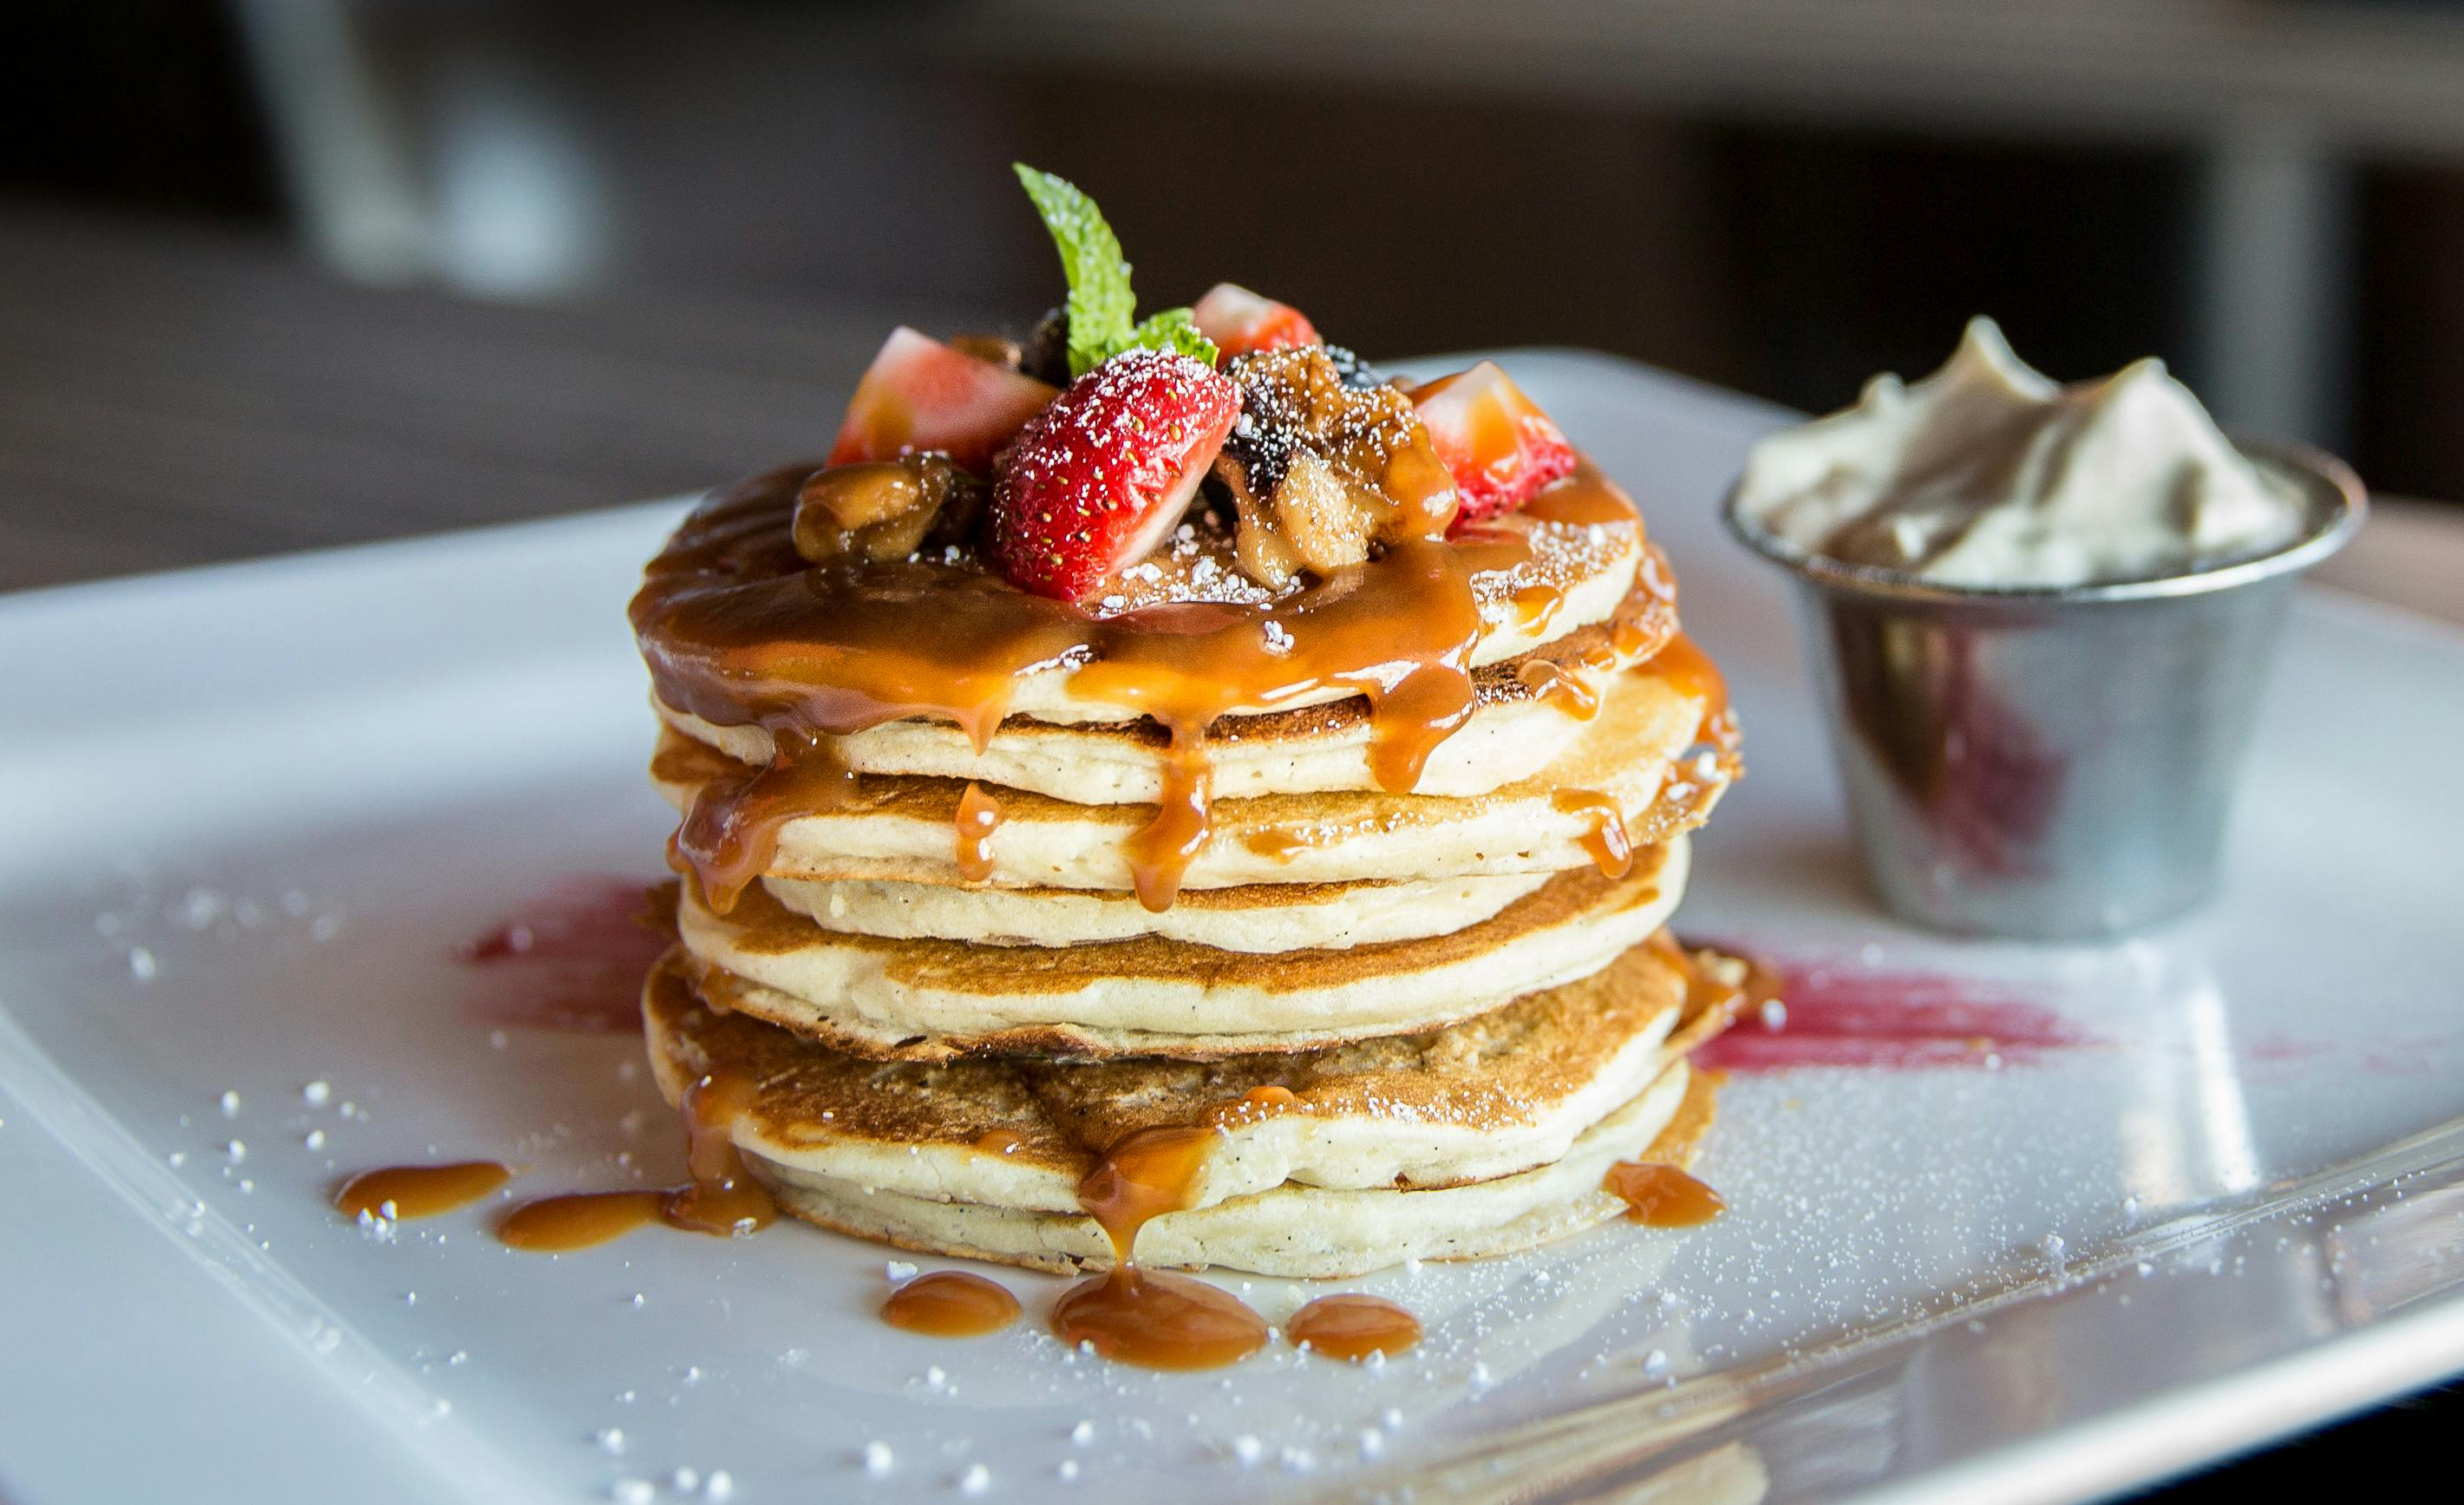

In [10]:
# IMPORTANT: Replace this with the path to your downloaded image file
# Make sure the image file is in the same directory as the notebook
image_filename = "images/pancake.jpg"  # <--- CHANGE THIS to your image file name

# Use Pillow's Image.open() to load the image from the file
img = Image.open(image_filename)
print(f"Image '{image_filename}' loaded successfully.")
print(f"Format: {img.format}")
print(f"Size: {img.size}")
print(f"Mode: {img.mode}")

# Use IPython.display to show the image directly in the notebook output
display(img)

# Keep the loaded image object in a variable for later use
image_to_analyze = img


In [11]:
# The io module in Python provides tools for working with streams of data
# like reading from or writing to files in memory
import io  

# Used for encoding images for OpenAI's API
import base64  

In [12]:
# This function converts an image into a special text format (called base64)
# This is used if we want to send an image to OpenAI’s API

# This function works with two types of inputs: 
# (1) A file path: a string that tells the function where the image is stored on your computer.
# (2) An image object: a photo already loaded in memory using the PIL library (Python Imaging Library).

def encode_image_to_base64(image_path_or_pil):
    if isinstance(image_path_or_pil, str):  # If it's a file path
        # Check if the file exists
        if not os.path.exists(image_path_or_pil):
            raise FileNotFoundError(f"Image file not found at: {image_path_or_pil}")
        with open(image_path_or_pil, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")
            
    elif isinstance(image_path_or_pil, Image.Image):  # If it's a PIL Image object
        buffer = io.BytesIO()
        image_format = image_path_or_pil.format or "JPEG"  # Default to JPEG if format unknown
        image_path_or_pil.save(buffer, format=image_format)
        return base64.b64encode(buffer.getvalue()).decode("utf-8")
    else:
        raise ValueError("Input must be a file path (str) or a PIL Image object.")


In [18]:
import google.generativeai as genai
import PIL.Image

def query_gemini_vision(model, image, prompt, max_tokens=100):
    """
    Function to query Gemini's vision model with an image
    
    Args:
        model: The initialized genai.GenerativeModel object
        image: PIL Image object to analyze
        prompt: Text prompt to send with the image
        max_tokens: Maximum tokens in response (default: 100)
        
    Returns:
        The model's response text or an error message
    """
    
    try:
        # 1. Construct the Generation Config (for max tokens)
        my_config = genai.GenerationConfig(
            max_output_tokens=max_tokens
        )

        # 2. Make the API call
        # Note: Gemini takes a simple list [prompt, image]
        response = model.generate_content(
            [prompt, image], 
            generation_config=my_config
        )

        # 3. Extract the text
        return response.text
    
    except Exception as e:
        return f"Error calling API: {e}"

In [19]:
# Let's define our text prompt that will be sent with the image
food_recognition_prompt = """
Context: I'm analyzing a food image for a calorie-tracking application.
Instruction: Please identify the food item in this image.
Input: [The image I'm about to share]
Output: Provide the name of the food, a brief description of what you see, and if possible, mention its typical ingredients or nutritional profile.
"""
print(f"{food_recognition_prompt}")


Context: I'm analyzing a food image for a calorie-tracking application.
Instruction: Please identify the food item in this image.
Input: [The image I'm about to share]
Output: Provide the name of the food, a brief description of what you see, and if possible, mention its typical ingredients or nutritional profile.



In [21]:


result = query_gemini_vision(
    model=model,
    image=img, 
    prompt="Describe this food in detail",
    max_tokens=150
)

print(result)

This is a mouthwatering stack of six golden-brown pancakes, piled high on a white rectangular plate. Each pancake appears to be about half an inch thick, with slightly uneven, homemade edges. The surfaces are lightly speckled with darker brown spots, indicating a perfect cook.

Generously drizzled over the entire stack is a thick, glistening caramel sauce. It cascades down the sides of the pancakes, pooling in small puddles on the plate and creating an irresistible sheen.

The top pancake is adorned with a vibrant garnish. Sliced strawberries, their red flesh and tiny seeds clearly visible, are scattered among what appear to be chopped nuts, possibly walnuts or pecans. A delicate sprig of fresh mint adds a touch of green to the ensemble, and


In [22]:
response = model.generate_content([food_recognition_prompt, img])

In [23]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "**Food Item:** Pancakes\n\n**Description:** The image shows a stack of several golden-brown pancakes, generously drizzled with a rich caramel sauce. The pancakes are topped with fresh strawberry slices, some nuts, and a sprig of mint for garnish. A small metal ramekin filled with a white, creamy topping, likely whipped cream or yogurt, is placed to the side. The plate is also dusted with powdered sugar.\n\n**Typical Ingredients & Nutritional Profile:**\n\n*   **Pancakes:** Typically made from a batter of flour, eggs, milk, and a leavening agent like baking powder. They are a source of carbohydrates.\n*   **Caramel Sauce:** Primarily sugar, butter, and cream, contributing significant calories, sugar, and fat.\n*   **Strawberries:** A good source of Vitamin C 

In [25]:
# Let's define a structured prompt to ensure consistent model output
structured_nutrition_prompt = """
# Nutritional Analysis Task

## Context
You are a nutrition expert analyzing food images to provide accurate nutritional information.

## Instructions
Analyze the food item in the image and provide estimated nutritional information based on your knowledge.

## Input
- An image of a food item

## Output
Provide the following estimated nutritional information for a typical serving size or per 100g:
- food_name (string)
- serving_description (string, e.g., '1 slice', '100g', '1 cup')
- calories (float)
- fat_grams (float)
- protein_grams (float)
- confidence_level (string: 'High', 'Medium', or 'Low')

**IMPORTANT:** Respond ONLY with a single JSON object containing these fields. Do not include any other text, explanations, or apologies. The JSON keys must match exactly: "food_name", "serving_description", "calories", "fat_grams", "protein_grams", "confidence_level". If you cannot estimate a value, use `null`.

Example valid JSON response:
{
  "food_name": "Banana",
  "serving_description": "1 medium banana (approx 118g)",
  "calories": 105.0,
  "fat_grams": 0.4,
  "protein_grams": 1.3,
  "confidence_level": "High"
}
"""


In [26]:
# Let's call OpenAI API with the image and the new structured prompt
openai_nutrition_result = query_gemini_vision(
    model=model,
    image=img, 
    prompt=structured_nutrition_prompt,
    max_tokens=150
)

print_markdown(openai_nutrition_result)

```json
{
  "food_name": "Pancakes with Caramel Sauce and Strawberries",
  "serving_description": "stack of 5 pancakes",
  "calories": 750.0,
  "fat_grams": 30.0,
  "protein_grams": 15.0,
  "confidence_level": "Medium"
}
```